In [1]:
#importing various libraries that can prove useful in my analysis, mainly for visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as mp

In [2]:
#Read in the car data, this data has 5 columns based on User Id, Gender, Age, AnnualSalary and Purchased 
Cars= pd.read_csv('car_data.csv')
data = pd.read_csv('data.csv')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

In [4]:
Cars.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


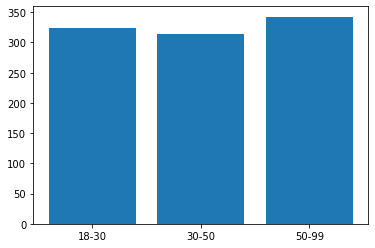

In [5]:
#This visualization was to check for the correlation between the age group and the purchases. I was trying to see if a certain age group were more likely to purchase 
#I also wanted to group the ages into the categories 
K=1000
df = pd.DataFrame({'age': np.random.randint(18, 99, K),
                   'Purchased': 20 + 402*np.abs(np.random.randn(K))})

df['group'] = pd.cut(df['age'], bins = [18, 30, 50, 99], include_lowest = True, labels = ['18-30', '30-50', '50-99'])

df = df.groupby(by = 'group').mean()


fig, ax = mp.subplots()

ax.bar(x = df.index, height = df['Purchased'])

mp.show()

In [6]:
df.head()

,age,Purchased
group,,
18-30,24.371622,324.247231
30-50,40.744094,313.857116
50-99,74.658863,342.561745


In [7]:
data.head()

,brand,name,bodyType,color,fuelType,mileage,transmission,price
0,Fiat,124 Spider,open,blue,Gasoline,8000.0,Automatic,1830000
1,BMW,i3,hatchback 5 doors,black,Electro,12000.0,Automatic,1830000
2,Mercedes-Benz,GLE Coupe,jeep 5 doors,burgundy,Gasoline,57000.0,AT,4600000
3,Mercedes-Benz,G-Class,jeep 5 doors,black,Gasoline,200000.0,AT,2999999
4,Audi,Q7,jeep 5 doors,white,Gasoline,67000.0,Automatic,3300000


In [8]:
merged = Cars.merge(data, left_on = 'User ID', right_on='mileage')

In [9]:
merged.head()

,User ID,Gender,Age,AnnualSalary,Purchased,brand,name,bodyType,color,fuelType,mileage,transmission,price
0,1000,Female,40,76500,1,Nissan,Juke,jeep 5 doors,black,Gasoline,1000.0,CVT,775000
1,1000,Female,40,76500,1,Honda,Insight,liftback,grey,Gasoline,1000.0,CVT,580000
2,1000,Female,40,76500,1,Honda,Shuttle,station wagon,white,Gasoline,1000.0,Robot,1030000
3,1000,Female,40,76500,1,Honda,Vezel,jeep 5 doors,white,Gasoline,1000.0,CVT,2430000
4,1000,Female,40,76500,1,Toyota,Hilux Surf,jeep 5 doors,grey,Diesel,1000.0,AT,920000


In [10]:
Cars.shape

(999, 5)

<AxesSubplot:xlabel='Gender', ylabel='count'>

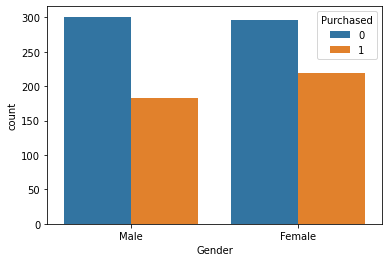

In [11]:
#A count plot to show what gender was more likely to purchase a car. It was found that female were more likely  to purchase 
import seaborn as sb
sb.countplot(data=Cars, x='Gender', hue='Purchased')

<AxesSubplot:xlabel='Age', ylabel='Count'>

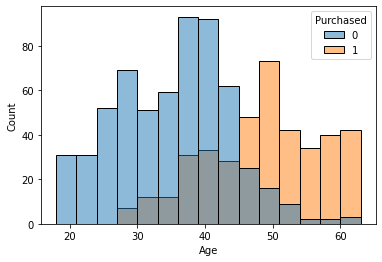

In [12]:
#This visualization also shows a correlation between the age and purchased. I realised that older people were more likely to purchase a car than younger people. Also because they earn more. 
sb.histplot(data = Cars, x='Age', hue='Purchased')

<AxesSubplot:xlabel='AnnualSalary', ylabel='Count'>

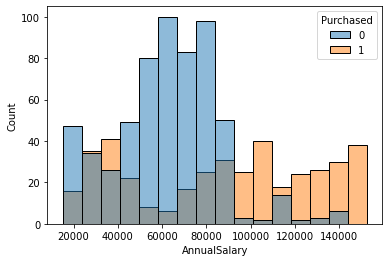

In [13]:
# A plot to compare the annualSalary and the cars purhased. I know annualSalary is definetly going to impact purchasing power
sb.histplot(data=Cars, x='AnnualSalary', hue='Purchased')

<AxesSubplot:xlabel='AnnualSalary', ylabel='Count'>

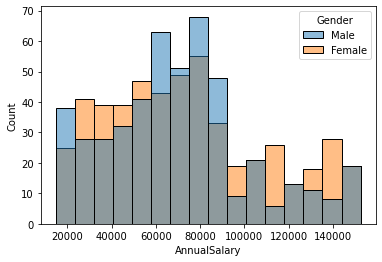

In [14]:
sb.histplot(data=Cars, x='AnnualSalary', hue='Gender')

<AxesSubplot:xlabel='Age'>

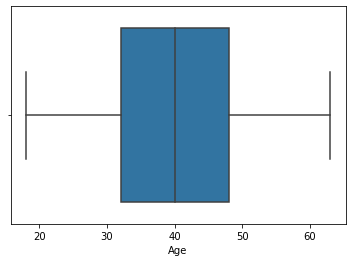

In [15]:
#I just wanted to know what the average age in the dataset was and also show the average age of a car buyer 
sb.boxplot(data=Cars, x='Age', hue='Purchased')

In [16]:
features=['Age', 'AnnualSalary']
X=Cars[features]
Y=Cars.Purchased

In [17]:
#I ran the decision tree model and it was not as accurate as i wanted probably because of the random of human behavior when it comes to purchases
train_X, val_X, train_Y, val_Y = train_test_split(X, Y,random_state = None,shuffle=True)

tree_model=DecisionTreeRegressor(random_state=1)
tree_model.fit(train_X,train_Y)

model_predict=tree_model.predict(val_X)
decision=mean_absolute_error(val_Y,model_predict)

print(decision)

0.134


In [18]:
series=pd.Series(model_predict)

Text(0, 0.5, 'Y-Predict')

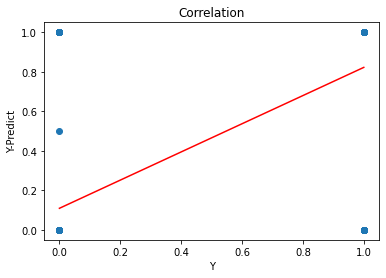

In [19]:
#This a correlation model to see the whether there was a correlation the Age of a customer and annual salary in relation to if they ended up buying a car.
mp.title('Correlation')
mp.scatter(val_Y,series)
mp.plot(np.unique(val_Y), np.poly1d(np.polyfit(val_Y, series, 1))(np.unique(val_Y)), color='Red')
  
# Labelling axes
mp.xlabel('Y')
mp.ylabel('Y-Predict')

In [20]:
corr_value=val_Y.corr(series)
print(corr_value)

-0.03219568887613411
